<a href="https://colab.research.google.com/github/justinsiek/LocalExtremePredictor/blob/main/LocalExtremePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
msft = yf.Ticker('MSFT')
msft_data = msft.history(start="2024-01-01")

In [3]:
def check_top(data, current, order):
    if current < order * 2 + 1:
        return False
    check = current - order
    check_price = data[check]
    for i in range(1, order + 1):
        if data[check + i] > check_price or data[check - i] > check_price:
            return False
    return True

In [4]:
def check_bottom(data, current, order) -> bool:
    if current < order * 2 + 1:
        return False
    check = current - order
    check_price = data[check]
    for i in range(1, order + 1):
        if data[check + i] < check_price or data[check - i] < check_price:
            return False
    return True

In [16]:
def check_extremes(data, order):
    res = ['none'] * len(data)
    for i in range(order, len(data)):
        if check_top(data, i, order):
            pos = i - order
            res[pos] = 'top'
        elif check_bottom(data, i, order):
            pos = i - order
            res[pos] = 'bottom'
    return res

In [30]:
extremes = check_extremes(msft_data['Close'].to_numpy(), 4)
msft_data = msft_data.assign(extremes=extremes)

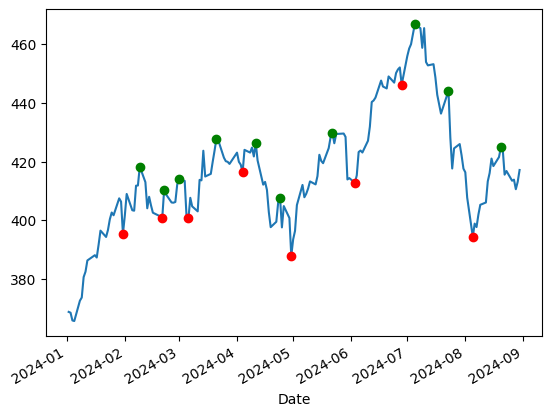

In [31]:
tops = msft_data[msft_data['extremes'] == 'top']
bottoms = msft_data[msft_data['extremes'] == 'bottom']

msft_data['Close'].plot()

plt.plot(tops.index, tops['Close'], marker='o', linestyle='None', color='green')

plt.plot(bottoms.index, bottoms['Close'], marker='o', linestyle='None', color='red')

plt.show()